In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the lifted gene annotation and the actual gene annotation
# lifted = pd.read_csv('../gene_annotation_comparison/ARS_UCD2.0_protein_coding.to.Wagyu.bed',
# sep='\t', comment='#', header=None, dtype={0:str})
actual = pd.read_csv('../../../REFERENCES/UOA_WAGYU/UOA_Wagyu_1_Y.ensembl.gtf',
comment='#',sep='\t', header=None, dtype={0:str})
ars_ucd2 = pd.read_csv('../../../REFERENCES/ARS_UCD2.0/ARS-UCD2.genomic.gtf',
comment='#',sep='\t', header=None, dtype={0:str})
ars_ucd13 = pd.read_csv('../../../REFERENCES/ARS_UCD1.3/Bos_taurus.ARS-UCD1.3.112.gtf',
                        comment='#',sep='\t', header=None, dtype={0:str})
chrs = [str(i) for i in range(1,30)] + ['X', 'Y']

In [ ]:
# Load the ARS-UCD2.0 chromosome names
ars_names = pd.read_csv('../../../REFERENCES/ARS_UCD2.0/chr_names.txt', sep='\t', header=None, names=['chr', 'name'])

ars_names_dict = dict(zip(ars_names['name'], ars_names['chr']))

ars_ucd2[0] = ars_ucd2[0].map(ars_names_dict)

# Filter the lifted gene annotation to only include placed chromosomes
# lifted = lifted[lifted[0].isin(chrs)]
# chrs = ['X']
actual = actual[actual[0].isin(chrs)]
ars_ucd2 = ars_ucd2[ars_ucd2[0].isin(chrs)]
ars_ucd13 = ars_ucd13[ars_ucd13[0].isin(chrs)]

In [ ]:
# ars_ucd2_bed = ars_ucd2[(ars_ucd2[2] == 'gene') & (ars_ucd2[8].str.contains("protein_coding"))].copy()
# ars_ucd2_bed['geneID'] = ars_ucd2_bed[8].str.extract(r'gene_id "([\w\.\-\(\)]+)"')
# ars_ucd2_bed = ars_ucd2_bed[[0,3,4,'geneID',5,6]]

# ars_ucd2_bed.to_csv('../gene_annotation_comparison/ARS_UCD2.0_protein_coding.bed', sep='\t', header=False, index=False)

ars_ucd2['biotype'] = ars_ucd2[8].str.extract(r'gene_biotype "([\w\.\-\(\)]+)"')
ars_ucd2['geneID'] = ars_ucd2[8].str.extract(r'gene_id "([\w\.\-\(\)]+)"')

# Count the number of different biotypes based on their geneID
ars_ucd2.groupby('biotype')['geneID'].nunique().to_clipboard()

In [ ]:
# Used to reformat the ensembl gtf file to a bed-like file.

# actual['biotype'] = actual[8].str.extract(r'gene_biotype "([\w\.\-\(\)]+)"')
# actual['geneID'] = actual[8].str.extract(r'gene_id "([\w\.\-\(\)]+)"')
# actual['geneName'] = actual[8].str.extract(r'gene_name "([\w\.\-\(\)]+)"')

# bed_file = open('../gene_annotation_comparison/UOA_Wagyu_1_Y.ensembl.bed', 'w')
# for row in actual.itertuples():
#     if row._3 != 'gene':
#         continue
#     _chrom = row._1
#     _start = row._4 - 1
#     _end = row._5
#     if type(row.geneName) == str:
#         _name = row.geneName
#     else:
#         _name = row.geneID
#     _score = row.biotype
#     _strand = row._7
#     bed_file.write(f'{_chrom}\t{_start}\t{_end}\t{_name}\t{_score}\t{_strand}\n')
# bed_file.close()

In [ ]:
actual['biotype'] = actual[8].str.extract(r'gene_biotype "([\w\.\-\(\)]+)"')
actual['geneID'] = actual[8].str.extract(r'gene_id "([\w\.\-\(\)]+)"')

# Count the number of different biotypes based on their geneID
actual.groupby('biotype')['geneID'].nunique().to_clipboard()
print(actual.groupby('biotype')['geneID'].nunique())



biotype
IG_C_gene                   4
IG_D_gene                   3
IG_J_gene                   2
IG_V_gene                  39
TR_C_gene                   8
TR_J_gene                  24
TR_V_gene                 203
Y_RNA                      15
lncRNA                  13502
miRNA                     905
misc_RNA                   24
processed_pseudogene       26
protein_coding          20288
pseudogene                278
rRNA                     1398
ribozyme                    6
scaRNA                     29
snRNA                    1249
snoRNA                    804
vault_RNA                   8
Name: geneID, dtype: int64


In [ ]:
ars_ucd13['biotype'] = ars_ucd13[8].str.extract(r'gene_biotype "([\w\.\-\(\)]+)"')
ars_ucd13['geneID'] = ars_ucd13[8].str.extract(r'gene_id "([\w\.\-\(\)]+)"')

# Count the number of different biotypes based on their geneID
ars_ucd13.groupby('biotype')['geneID'].nunique().to_clipboard()
print(ars_ucd13.groupby('biotype')['geneID'].nunique())


biotype
IG_C_gene                    13
IG_V_gene                     4
TR_C_gene                     3
TR_J_gene                    20
TR_V_gene                    54
Y_RNA                        15
lncRNA                     8448
miRNA                      1007
misc_RNA                     25
processed_pseudogene         64
protein_coding            23740
pseudogene                  526
rRNA                         63
ribozyme                      6
scaRNA                       30
snRNA                      1214
snoRNA                      736
tRNA                          9
transcribed_pseudogene        1
vault_RNA                     8
Name: geneID, dtype: int64


In [ ]:
ars_ucd2['biotype'] = ars_ucd2[8].str.extract(r'gene_biotype "([\w\.\-\(\)]+)"')
ars_ucd2['geneID'] = ars_ucd2[8].str.extract(r'gene_id "([\w\.\-\(\)]+)"')

# Count the number of different biotypes based on their geneID
ars_ucd2.groupby('biotype')['geneID'].nunique().to_clipboard()
print(ars_ucd2.groupby('biotype')['geneID'].nunique())

biotype
C_region                     18
RNase_MRP_RNA                 1
SRP_RNA                       1
V_segment                   104
antisense_RNA                 1
lncRNA                     5551
miRNA                      1029
misc_RNA                     42
ncRNA                        28
other                         3
protein_coding            21423
pseudogene                 4292
rRNA                         14
snRNA                       965
snoRNA                      635
tRNA                       2279
telomerase_RNA                1
transcribed_pseudogene       59
Name: geneID, dtype: int64


In [ ]:
# Get the number of protein coding genes
a_pc = actual[(actual[2] == 'gene') & (actual[8].str.contains("protein_coding"))].shape[0]
r_pc = ars_ucd2[(ars_ucd2[2] == 'gene') & (ars_ucd2[8].str.contains('protein_coding'))].shape[0]
or_pc = ars_ucd13[(ars_ucd13[2] == 'gene') & (ars_ucd13[8].str.contains('protein_coding'))].shape[0]
print(a_pc, 'vs', r_pc, 'vs', or_pc)

20549 vs 21423 vs 23740


In [ ]:
# Compare number of protein-coding genes on each chromosome
actual_genes = actual[(actual[2] == 'gene') & (actual[8].str.contains('protein_coding'))]
ars_genes = ars_ucd2[(ars_ucd2[2] == 'gene') & (ars_ucd2[8].str.contains('protein_coding'))]
ars13_genes = ars_ucd13[(ars_ucd13[2] == 'gene') & (ars_ucd13[8].str.contains('protein_coding'))]
# Get the number of genes on each chromosome
a_pc = actual_genes[0].value_counts().reset_index(name='Protein-coding genes').rename(columns={0:'chromosome'})
r_pc = ars_genes[0].value_counts().reset_index(name='Protein-coding genes').rename(columns={0:'chromosome'})
# l_pc = lifted[0].value_counts().reset_index(name='Protein-coding genes').rename(columns={0:'chromosome'})
or_pc = ars13_genes[0].value_counts().reset_index(name='Protein-coding genes').rename(columns={0:'chromosome'})

a_pc['Assembly'] = 'UOA_Wagyu_1'
r_pc['Assembly'] = 'ARS_UCD2.0'
or_pc['Assembly'] = 'ARS_UCD1.3'
a_pc = a_pc.set_index('chromosome').reindex(chrs).reset_index()
r_pc = r_pc.set_index('chromosome').reindex(chrs).reset_index()
or_pc = or_pc.set_index('chromosome').reindex(chrs).reset_index()
arl_pc = pd.concat([a_pc, r_pc, or_pc])

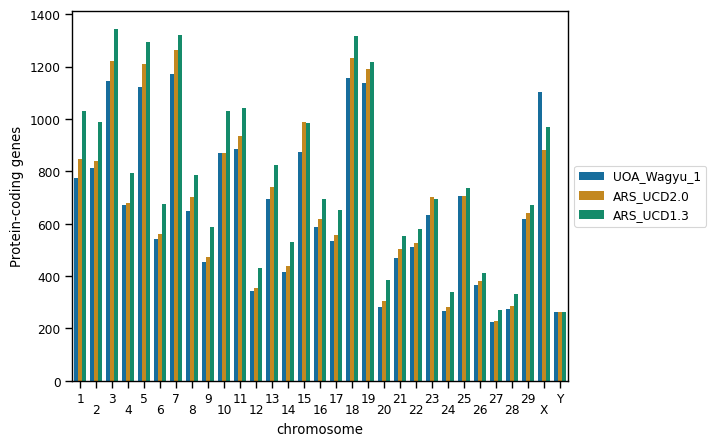

In [ ]:
sns.set_context('paper')
g = sns.barplot(data=arl_pc[arl_pc['Assembly'] != 'Lifted'], x='chromosome', y='Protein-coding genes',
                hue='Assembly', palette='colorblind')
# Adjust x-axis labels to alternate their distance from the x-axis
for i, label in enumerate(g.get_xticklabels()):
    if i % 2 == 0:
        # label.set_position((label.get_position()[0], -0.1))  # Move even labels down
        pass
    else:
        label.set_position((label.get_position()[0], -0.03))  # Move odd labels further down

# Move the legend outside the plot
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig('/Users/callummacphillamy/OneDrive - University of Adelaide/Postdoc/Bovine_pangenome/genome_assembly_and_svs/MANUSCRIPT/images/protein_coding_genes_per_chromosome.png', dpi=400, bbox_inches='tight')

In [ ]:
for chr in chrs:
    x = arl_pc[arl_pc['chromosome'] == chr]
    if x.loc[x['Assembly'] == 'UOA_Wagyu_1', 'Protein-coding genes'].values[0] > x.loc[x['Assembly'] == 'ARS_UCD2.0', 'Protein-coding genes'].values[0]:
        print(chr)

print('############')
for chr in chrs:
    x = arl_pc[arl_pc['chromosome'] == chr]
    if x.loc[x['Assembly'] == 'UOA_Wagyu_1', 'Protein-coding genes'].values[0] > x.loc[x['Assembly'] == 'ARS_UCD1.3', 'Protein-coding genes'].values[0]:
        print(chr)

10
X
############
X


In [ ]:
# Compare number of pseudogenes on each chromosome
actual_pgenes = actual[(actual[2] == 'gene') & (actual[8].str.contains('pseudogene'))]
ars_pgenes = ars_ucd2[(ars_ucd2[2] == 'gene') & (ars_ucd2[8].str.contains('pseudogene'))]

# Get the number of genes on each chromosome
a_p = actual_pgenes[0].value_counts().reset_index(name='Pseudogenes').rename(columns={0:'chromosome'})
r_p = ars_pgenes[0].value_counts().reset_index(name='Pseudogenes').rename(columns={0:'chromosome'})

a_p['Assembly'] = 'UOA_Wagyu_1'
r_p['Assembly'] = 'ARS_UCD2.0'
a_p = a_p.set_index('chromosome').reindex(chrs).reset_index()
r_p = r_p.set_index('chromosome').reindex(chrs).reset_index()
ar_p = pd.concat([a_p, r_p])

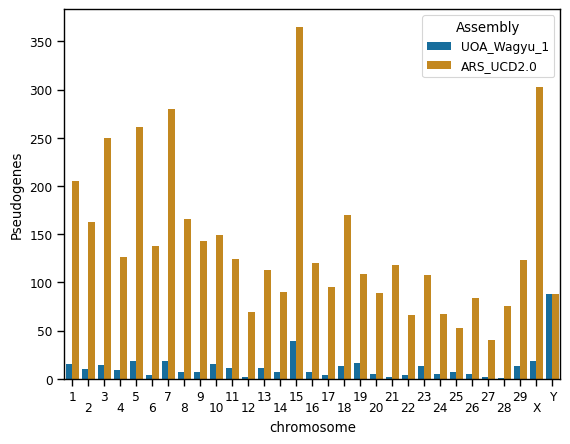

In [ ]:
# sns.set_context('paper')
# g = sns.barplot(data=ar_p, x='chromosome', y='Pseudogenes', hue='Assembly',
#                 palette='colorblind')
# # Adjust x-axis labels to alternate their distance from the x-axis
# for i, label in enumerate(g.get_xticklabels()):
#     if i % 2 == 0:
#         # label.set_position((label.get_position()[0], -0.1))  # Move even labels down
#         pass
#     else:
#         label.set_position((label.get_position()[0], -0.03))  # Move odd labels further down

In [ ]:
# # Find genes in UOA_Wagyu_1 not in ARS_UCD2.0
# actual = actual[(actual[2] == 'gene') & (actual[8].str.contains("protein_coding"))].copy()
# actual['geneID'] = actual[8].str.extract(r'gene_id "([\w\.\-\(\)]+)"')
# actual['geneName'] = actual[8].str.extract(r'gene_name "([\w\.\-\(\)]+)"')

# with open('../gene_annotation_comparison/UOA_Wagyu_1_protein_coding.bed', 'w') as f:
#     for row in actual.itertuples():
#         if type(row.geneName) is float:
#             f.write(f'{row._1}\t{row._4}\t{row._5}\t{row.geneID}\t.\t{row._7}\n')
#         else:
#             f.write(f'{row._1}\t{row._4}\t{row._5}\t{row.geneName}\t.\t{row._7}\n')

In [ ]:
actual_genes_X = actual_genes[actual_genes[0] == 'X']
actual_genes_X['geneName'] = actual_genes_X[8].str.extract(r'gene_name "([\w\.\-\(\)]+)"')
ars_genes_X = ars_genes[ars_genes[0] == 'X']
ars13_genes_X = ars13_genes[ars13_genes[0] == 'X']
ars13_genes_X['geneName'] = ars13_genes_X[8].str.extract(r'gene_name "([\w\.\-\(\)]+)"')

/var/folders/vl/n44v99hn7v96skr346cz_cl80000gn/T/ipykernel_21340/1304810767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_genes_X['geneName'] = actual_genes_X[8].str.extract(r'gene_name "([\w\.\-\(\)]+)"')
/var/folders/vl/n44v99hn7v96skr346cz_cl80000gn/T/ipykernel_21340/1304810767.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ars13_genes_X['geneName'] = ars13_genes_X[8].str.extract(r'gene_name "([\w\.\-\(\)]+)"')


In [ ]:
print(actual_genes_X.shape[0])
print(ars_genes_X.shape[0])
print(ars13_genes_X.shape[0])
ars_genes_X

1104
882
969


,0,1,2,3,4,5,6,7,8,biotype,geneID
1886062,X,Gnomon,gene,22541,127978,.,-,.,"gene_id ""KLHL4""; transcript_id """"; db_xref ""BG...",protein_coding,KLHL4
1886134,X,Gnomon,gene,543597,547783,.,-,.,"gene_id ""AGTR2""; transcript_id """"; db_xref ""BG...",protein_coding,AGTR2
1886158,X,BestRefSeq%2CGnomon,gene,812951,840271,.,+,.,"gene_id ""SLC6A14""; transcript_id """"; db_xref ""...",protein_coding,SLC6A14
1886221,X,Gnomon,gene,841328,843153,.,-,.,"gene_id ""CT83""; transcript_id """"; db_xref ""Gen...",protein_coding,CT83
1886244,X,Gnomon,gene,1427969,1437775,.,-,.,"gene_id ""LOC112445158""; transcript_id """"; db_x...",protein_coding,LOC112445158
...,...,...,...,...,...,...,...,...,...,...,...
1955827,X,Gnomon,gene,138719158,138751817,.,-,.,"gene_id ""XG""; transcript_id """"; db_xref ""GeneI...",protein_coding,XG
1955983,X,BestRefSeq%2CGnomon,gene,138754708,138784885,.,-,.,"gene_id ""CD99""; transcript_id """"; db_xref ""BGD...",protein_coding,CD99
1956037,X,Gnomon,gene,138811208,138826058,.,+,.,"gene_id ""LOC132344373""; transcript_id """"; db_x...",protein_coding,LOC132344373
1956045,X,Gnomon,gene,138855826,139007630,.,+,.,"gene_id ""DHRSX""; transcript_id """"; db_xref ""BG...",protein_coding,DHRSX


In [ ]:
not_in_ars = pd.read_csv('../gene_annotation_comparison/UOA_Wagyu_1_Y.ensembl.overlap.nonARSregions.tsv', sep='\t', header=None)
not_in_ars_dedup_gene_name = not_in_ars[not_in_ars[0] != 'X'].drop_duplicates(subset=3)
not_in_ars_dedup_gene_name
not_in_ars_dedup_gene_name[not_in_ars_dedup_gene_name[4] == 'protein_coding'][3].to_clipboard(index=False, header=False)

In [ ]:
not_in_ars_dedup_gene_name = not_in_ars[not_in_ars[0] == 'X'].drop_duplicates(subset=3)
not_in_ars_dedup_gene_name

not_in_ars_dedup_gene_name[not_in_ars_dedup_gene_name[4] == 'protein_coding']

,0,1,2,3,4,5,6,7,8,9,10,11
1395,X,31434100,31434581,ENSBTAG00085029180,protein_coding,-,X,31432729,31434581,UOA_Wagyu_1_Y:X:31432729:31434581,Wagyu_region_not_in_ARS,.
1396,X,31442721,31443202,ENSBTAG00085029251,protein_coding,-,X,31441350,31443202,UOA_Wagyu_1_Y:X:31441350:31443202,Wagyu_region_not_in_ARS,.
1398,X,31460692,31461204,ENSBTAG00085029332,protein_coding,-,X,31449689,31461321,UOA_Wagyu_1_Y:X:31449689:31461321,Wagyu_region_not_in_ARS,.
1399,X,39734788,39736230,YWHAH,protein_coding,+,X,39726261,39741855,UOA_Wagyu_1_Y:X:39726261:39741855,Wagyu_region_not_in_ARS,.
1400,X,40770929,40772120,ENSBTAG00085025416,protein_coding,+,X,40762152,40777746,UOA_Wagyu_1_Y:X:40762152:40777746,Wagyu_region_not_in_ARS,.
1401,X,41369431,41370589,EIF3M,protein_coding,-,X,41369411,41370589,UOA_Wagyu_1_Y:X:41369411:41370589,Wagyu_region_not_in_ARS,.
1402,X,42056484,42057469,YWHAB,protein_coding,+,X,42047501,42063095,UOA_Wagyu_1_Y:X:42047501:42063095,Wagyu_region_not_in_ARS,.
1403,X,43097628,43098819,ENSBTAG00085024230,protein_coding,+,X,43088851,43104445,UOA_Wagyu_1_Y:X:43088851:43104445,Wagyu_region_not_in_ARS,.
1406,X,46240390,46241545,ENSBTAG00085029152,protein_coding,+,X,46240390,46241545,UOA_Wagyu_1_Y:X:46240390:46241545,Wagyu_region_not_in_ARS,.
1408,X,49470862,49472053,ENSBTAG00085023992,protein_coding,+,X,49462085,49477682,UOA_Wagyu_1_Y:X:49462085:49477682,Wagyu_region_not_in_ARS,.
